##### Import Libraries

In [73]:
import pandas as  pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler , LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

##### Loading Data

In [74]:
file = './auto-mpg.csv'
cars = pd.read_csv( file )
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


##### 檢查是否有空值，並替換

In [75]:
cars[['horsepower']] = cars[['horsepower']].replace("?", np.nan)
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [76]:
cars.horsepower = pd.to_numeric(cars.horsepower)
cars[['horsepower']] = cars[['horsepower']].replace(np.nan, cars.horsepower.median())
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


##### 查看個變數之間的分布與關係

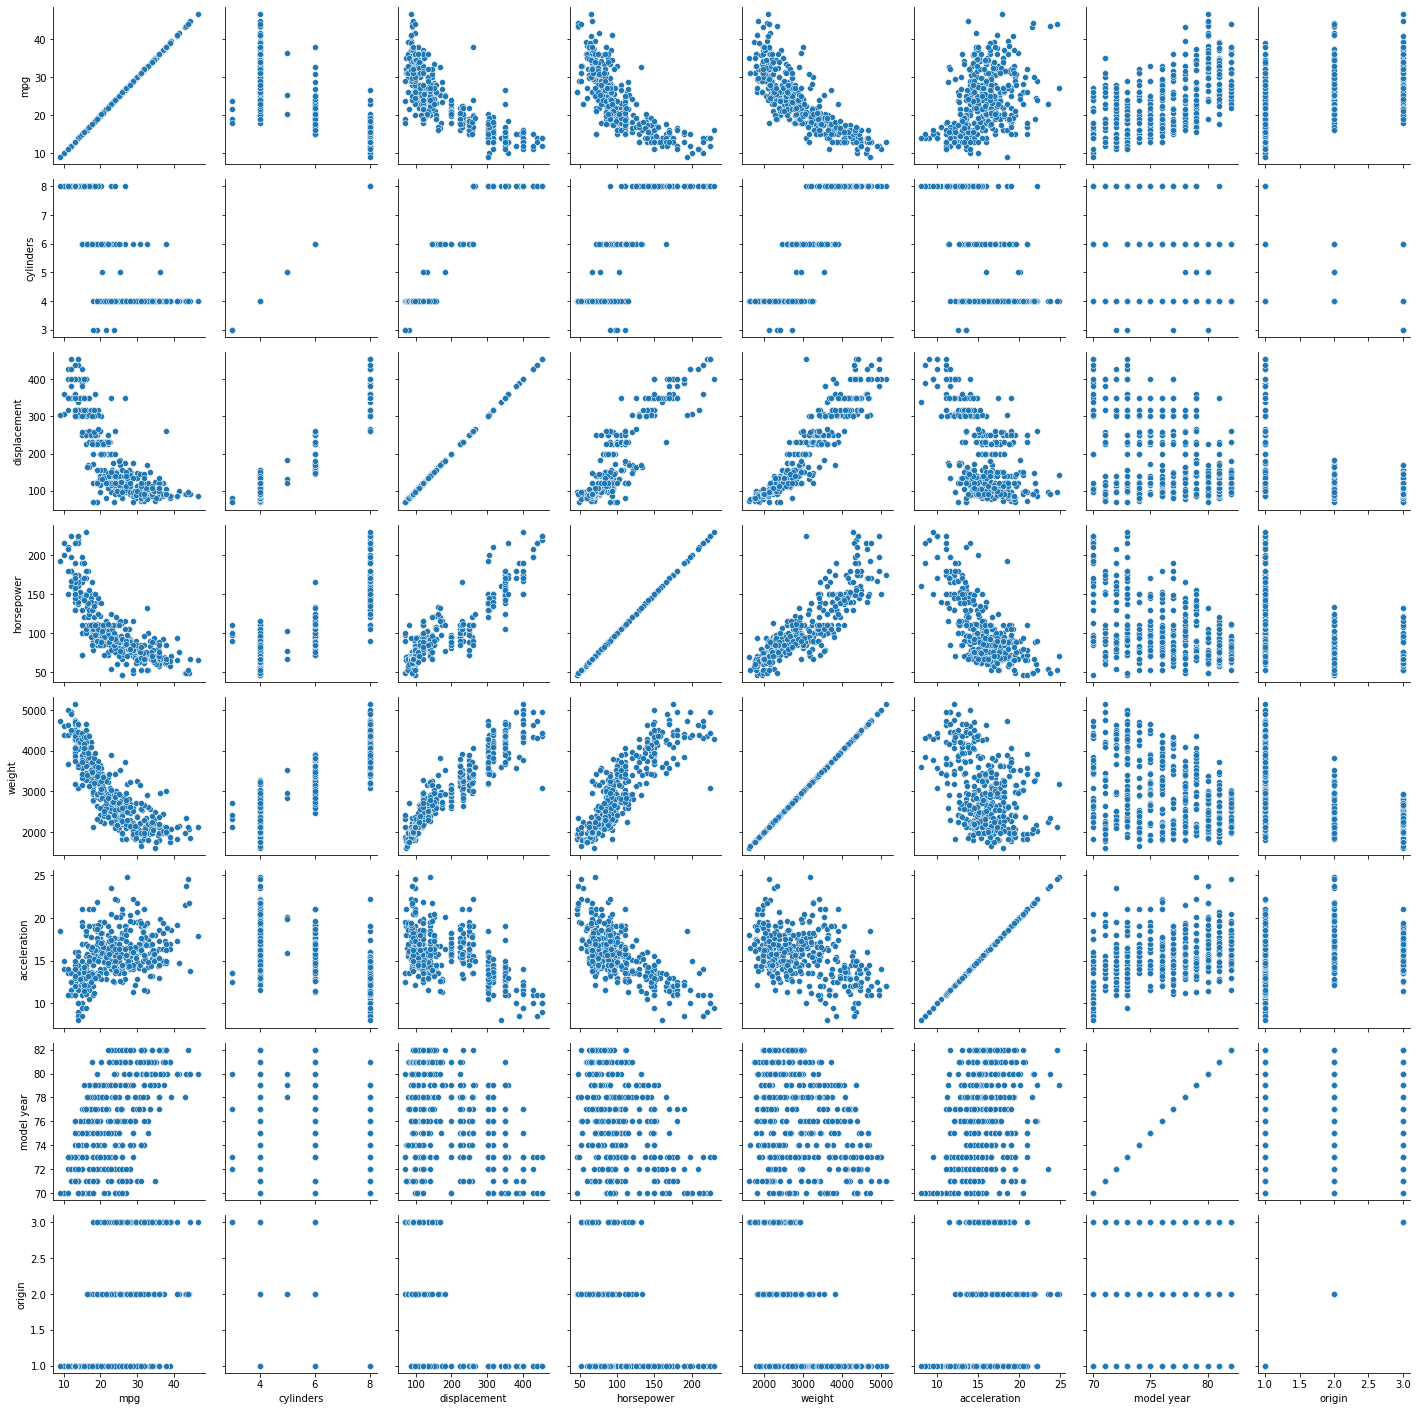

In [77]:
# pd.plotting.scatter_matrix(cars ,figsize=(16,16))
g = sns.PairGrid( cars )
g.map(sns.scatterplot)

##### 視覺化出變數之間的關係

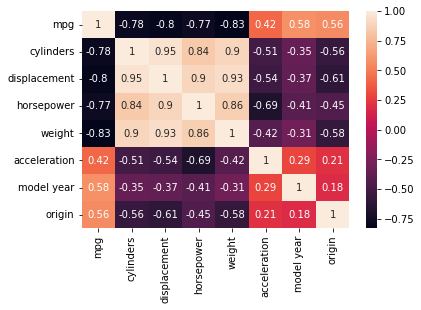

In [78]:
# plt.rcParams[ "figure.figsize" ] = (8,6)
sns.heatmap( cars.corr() , annot=True )
plt.show()

##### Cyclinder Count 對於mpg、horsepower、weight的影響

Text(0.5, 1.0, 'Cylinders & Weight')

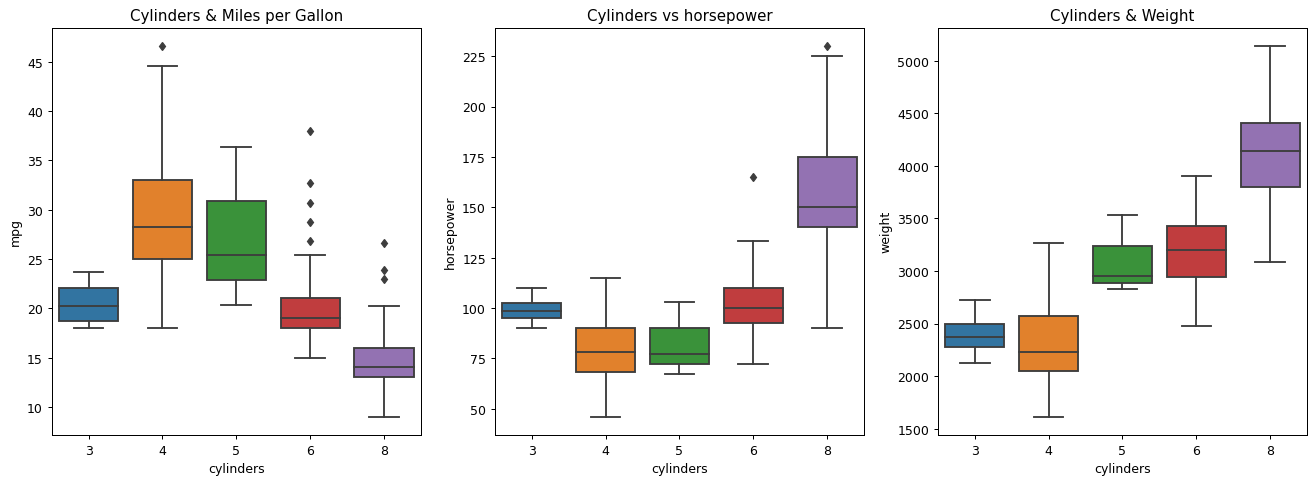

In [79]:
fig , axe = plt.subplots( figsize=(18,6) , nrows=1 ,ncols=3 , dpi=90 )

sns.boxplot( x='cylinders' , y='mpg' , data=cars , ax=axe[0] )
axe[0].set_title( 'Cylinders & Miles per Gallon' )

sns.boxplot(x="cylinders", y="horsepower", data=cars, ax=axe[1])
axe[1].set_title("Cylinders vs horsepower")

sns.boxplot( x='cylinders' , y='weight' , data=cars , ax=axe[2] )
axe[2].set_title( 'Cylinders & Weight' )



##### Weight對於 mpg、acceleration、horsepower的影響

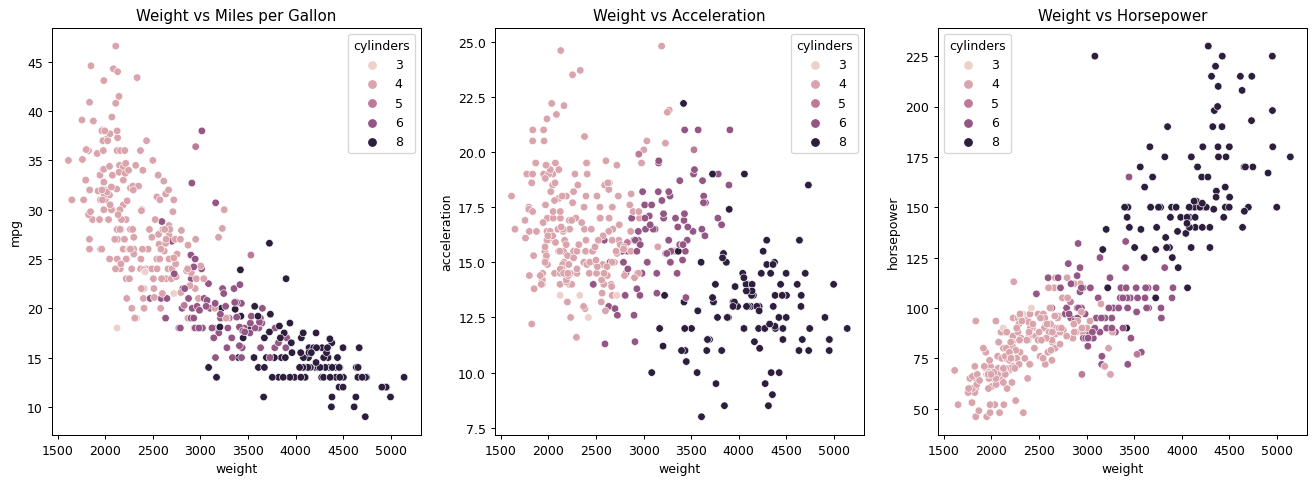

In [80]:
fig, axes = plt.subplots(figsize=(18, 6), nrows=1, ncols=3, dpi=90)

sns.scatterplot(x="weight", y="mpg", data=cars, hue="cylinders", ax=axes[0])
axes[0].set_title("Weight vs Miles per Gallon")

sns.scatterplot(x="weight", y="acceleration", data=cars, hue="cylinders", ax=axes[1])
axes[1].set_title("Weight vs Acceleration")

sns.scatterplot(x="weight", y="horsepower", data=cars, hue="cylinders", ax=axes[2])
axes[2].set_title("Weight vs Horsepower")

plt.show()

In [81]:

car_company = []
for car_name in cars["car name"]:
    car_name = car_name.split(" ")
    car_company.append(car_name[0])

cars["car company"] = car_company
cars.drop("car name", inplace=True, axis=1)
cars.head()
le = LabelEncoder()
cars["car company"] = le.fit_transform(cars["car company"])
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car company
0,18.0,8,307.0,130.0,3504,12.0,70,1,7
1,15.0,8,350.0,165.0,3693,11.5,70,1,3
2,18.0,8,318.0,150.0,3436,11.0,70,1,25
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,13


In [82]:
sc = StandardScaler()
scaled_cars = sc.fit_transform(cars.copy())

##### 套入主成分分析，並畫出Scree plot

[[-0.38163836  0.39795909  0.41219603  0.39533481  0.39663376 -0.25967654
  -0.20897311 -0.27870158 -0.15391873]
 [ 0.04957294  0.01936826  0.02050542 -0.17162183  0.05811336  0.35989544
   0.42799379 -0.46114723 -0.66223525]
 [-0.25785118 -0.15972968 -0.15124732 -0.17428715 -0.15890869  0.29253936
  -0.8029521  -0.07343254 -0.30625442]
 [-0.16259286  0.11096384  0.08894694 -0.11679194  0.23530069  0.65444879
   0.0228922  -0.28338178  0.61253551]
 [ 0.0945325  -0.18874297 -0.11089686 -0.10777111 -0.26549806 -0.42907807
  -0.07999089 -0.77687188  0.25884609]
 [-0.73605668 -0.49082452 -0.29964644  0.08143162  0.14169585 -0.102646
   0.29661363  0.04468233  0.01739792]
 [ 0.38157119 -0.51340817 -0.01272208  0.69177423  0.20264041  0.21557093
  -0.10972653 -0.10878316 -0.0263513 ]]


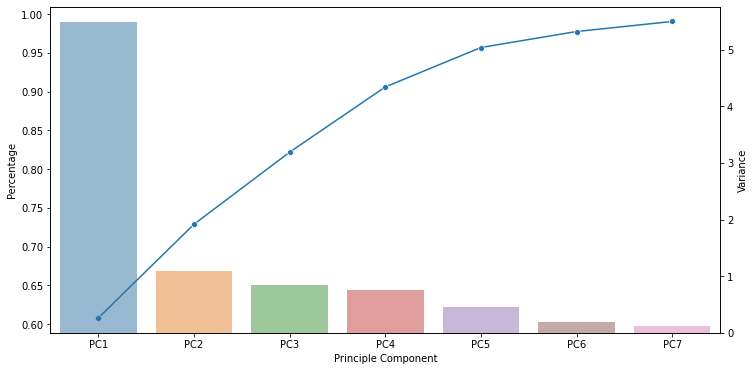

In [83]:
pca = PCA(7)
pca.fit_transform(scaled_cars)
component = pca.components_
var_val = pca.explained_variance_
ratio = pca.explained_variance_ratio_
var_cum = np.cumsum( ratio )

pc = []
for i in range(len(var_cum)):
   pc.append("PC" + str(i+1))

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

p1 = sns.lineplot(x=pc[:10], y=var_cum[:10], marker='o', sort = False, ax=ax1)
p1.set_xlabel( "Principle Component" )
p1.set_ylabel( "Percentage" )

ax2 = ax1.twinx()
ax2.set_ylabel("Variance")
sns.barplot( x = pc[:10] , y = var_val[:10], alpha=0.5, ax=ax2)
print(component)

In [84]:
train = cars[ :300 ]
test  = cars[ 300:]

train_x = train[[ "cylinders" ,  "displacement" , "horsepower" , "weight" , "acceleration" , "model year" , "origin" , "car company"]]
train_y = train[[ "mpg" ]]

test_x = test[[ "cylinders" ,  "displacement" , "horsepower" , "weight" , "acceleration" , "model year" , "origin"  , "car company"]]
test_y = test[[ "mpg" ]]

seletor = RFE( estimator=LinearRegression() , n_features_to_select=4 , step=10 )
seletor.fit(cars[[ "cylinders" ,  "displacement" , "horsepower" , "weight" , "acceleration" , "model year" , "origin" , "car company"]] ,
            cars[["mpg"]],  )
seletor.ranking_

array([1, 2, 2, 2, 1, 1, 1, 2])

##### 套入linear regression 來預測

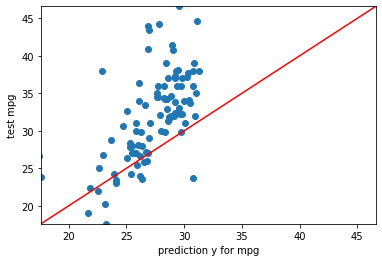

In [85]:
train = cars[ :300 ]
test  = cars[ 300:]

train_x = train[[ "cylinders" ,  "displacement" , "horsepower" , "acceleration" , "model year" , "origin"  ]]
train_y = train[[ "mpg" ]]

test_x = test[[ "cylinders" ,  "displacement" , "horsepower" , "acceleration" , "model year" , "origin"  ]]
test_y = test[[ "mpg" ]]

lr = LinearRegression()
lr.fit( train_x , train_y )
pred_y = lr.predict( test_x )

lineStart = test_y["mpg"].min()
lineEnd = test_y["mpg"].max() 

plt.figure()
plt.scatter( pred_y[: , 0] , test_y["mpg"] )
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlabel( "prediction y for mpg" )
plt.ylabel( "test mpg" )
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()


##### 用Kmean來分群

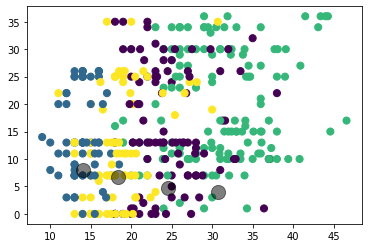

In [86]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(cars)
y_kmeans = kmeans.predict(cars)
# print(cars)
plt.scatter(cars["mpg"], cars["car company"], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);